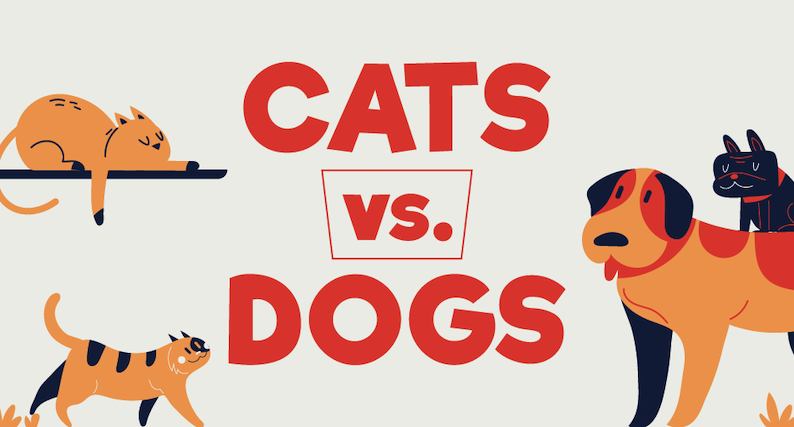

# Cats vs Dogs

In [208]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sklearn
import os
from sklearn.decomposition import PCA
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [209]:
address = r'/Users/nnussbaum/Ariel/הדמיית נתונים/dogs-vs-cats/train/'

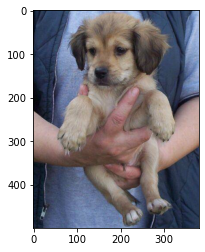

In [206]:
train = [address + i for i in os.listdir(address)]
im = cv2.imread(train[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
img = im
plt.imshow(img)

Let's see a few of the photos in the data:

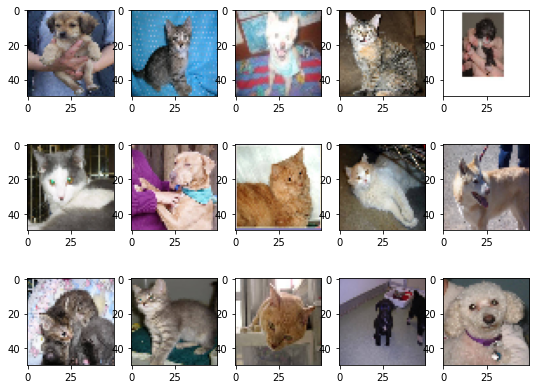

In [210]:
fig, ax = plt.subplots(nrows = 3,ncols = 5, figsize = (9,7))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    im = cv2.imread(train[i])
    im = cv2.resize(im, (50,50))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   
    plt.imshow(im)
plt.show()

In [168]:
files = os.listdir(address)

In [169]:
for i in range(10):
    print(files[i])

dog.8011.jpg
cat.5077.jpg
dog.7322.jpg
cat.2718.jpg
cat.10151.jpg
cat.3406.jpg
dog.1753.jpg
cat.4369.jpg
cat.7660.jpg
dog.5535.jpg


Let's put the data into a dataframe:

In [170]:
files = os.listdir(address)
df = pd.DataFrame({"File name": files, "Class": classes})
df["Class"] = df["Class"].replace({0: "cat", 1: "dog"})
df.head()

,File name,Class
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


Let's take a look at the data:

In [171]:
print(df.info)
print(df.Class.value_counts())
print(format(df.shape))

<bound method DataFrame.info of            File name Class
0       dog.8011.jpg   dog
1       cat.5077.jpg   cat
2       dog.7322.jpg   dog
3       cat.2718.jpg   cat
4      cat.10151.jpg   cat
...              ...   ...
24995   dog.8008.jpg   dog
24996   dog.1992.jpg   dog
24997  dog.12412.jpg   dog
24998   cat.2701.jpg   cat
24999  cat.10148.jpg   cat

[25000 rows x 2 columns]>
dog    12500
cat    12500
Name: Class, dtype: int64
(25000, 2)


In [172]:
df1 = pd.DataFrame()
for i in range(25000):
    img = cv2.imread(os.path.join(address, files[i]), 0)
    img_resized = cv2.resize(img, (28,28),interpolation = cv2.INTER_AREA)
    img_reshape = img_resized.reshape(28*28)
    one_row_of_df = pd.DataFrame(img_reshape)
    df1 = pd.concat([df1,one_row_of_df],axis=1)

In [173]:
df1.head(10)

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,34,101,109,27,255,77,201,143,25,145,...,141,23,11,188,58,28,62,3,132,85
1,50,119,181,28,255,65,89,174,26,150,...,181,48,6,186,62,30,39,23,142,73
2,67,115,180,29,255,63,82,175,21,153,...,207,32,4,224,64,26,39,11,153,60
3,69,114,164,28,255,42,88,175,17,153,...,189,32,6,203,78,34,43,19,162,53
4,70,117,198,28,255,59,83,176,14,155,...,187,33,35,245,77,37,71,24,170,45
5,72,120,200,27,255,55,73,178,11,157,...,193,34,50,231,87,29,99,103,177,68
6,163,126,196,28,255,56,57,179,9,158,...,205,42,76,206,89,39,41,195,182,93
7,187,133,192,30,255,71,79,180,5,161,...,177,104,114,255,88,38,88,189,188,109
8,188,135,180,29,255,107,65,180,4,163,...,193,42,128,241,95,41,56,188,194,103
9,186,133,187,28,255,73,59,180,8,164,...,218,52,92,198,94,43,42,181,197,96


Let's turn our data into black and white photos:

In [174]:
grey_df = df1.transpose()
grey_df.reset_index(drop=True,inplace=True)
grey_df['Class'] = df['Class']
grey_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Class
0,34,50,67,69,70,72,163,187,188,186,...,37,51,45,42,49,42,38,46,55,dog
1,101,119,115,114,117,120,126,133,135,133,...,147,146,147,143,127,123,102,92,69,cat
2,109,181,180,164,198,200,196,192,180,187,...,123,119,116,108,111,99,90,82,69,dog
3,27,28,29,28,28,27,28,30,29,28,...,95,68,63,59,46,33,32,40,43,cat
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,28,30,26,34,37,29,39,38,41,43,...,75,65,61,62,72,74,72,76,74,dog
24996,62,39,39,43,71,99,41,88,56,42,...,198,193,192,185,176,189,197,127,87,dog
24997,3,23,11,19,24,103,195,189,188,181,...,123,128,123,141,140,115,112,120,116,dog
24998,132,142,153,162,170,177,182,188,194,197,...,1,1,1,1,1,1,1,1,1,cat


Let's check whether our data is balanced:

In [175]:
grey_df['Class'].value_counts()

dog    12500
cat    12500
Name: Class, dtype: int64

It appears our data is balanced, as we have the same number of images for each class

Let's split the data into training and testing sets

In [176]:
x = grey_df.drop(['Class'], axis = 1)
y = grey_df['Class']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=120)

In [222]:
pca = PCA(n_components=0.95)
pca.fit(x_train)

PCA(n_components=0.95)

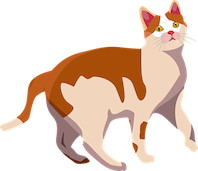

# Let's analyze the data using models:

Let's remember what the confusion matrix shows us:

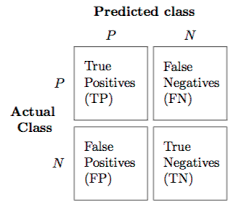

## Decision Tree Classifier

In [179]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)
prediction = dtree.predict(x_test)
dtc_a=accuracy_score(prediction,y_test)
print(dtc_a)

DecisionTreeClassifier(max_depth=2)

0.5562666666666667


Confusion matrix:

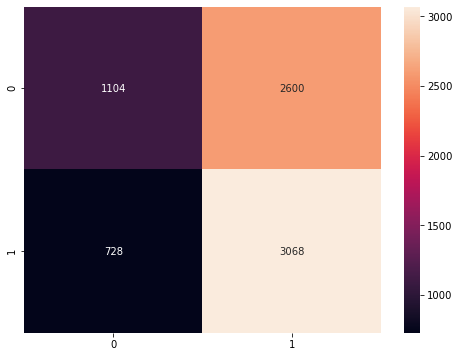

In [180]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Pipeline

In [181]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train)
prediction = pipe.predict(x_test)
ppl_a=accuracy_score(prediction,y_test)
print(ppl_a)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

0.6588


Confusion matrix:

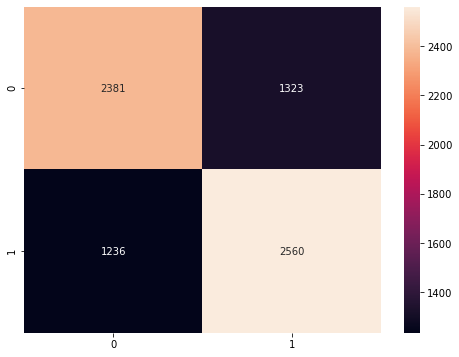

In [182]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Logistic Regression

In [183]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)
log_a = accuracy_score(prediction, y_test)
print(log_a)

LogisticRegression(max_iter=150)

0.5482666666666667


Confusion matrix:

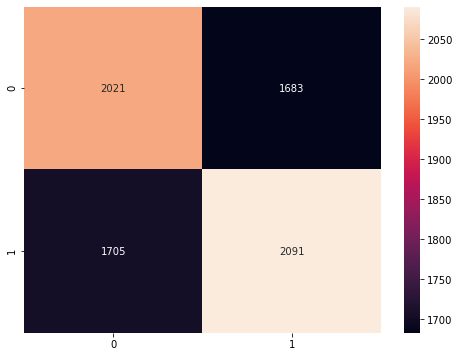

In [184]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## K Nearest Neighbors

In [185]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_a=accuracy_score(y_test, prediction)
print(knn_a)

KNeighborsClassifier(n_neighbors=8)

0.5896


Confusion matrix:

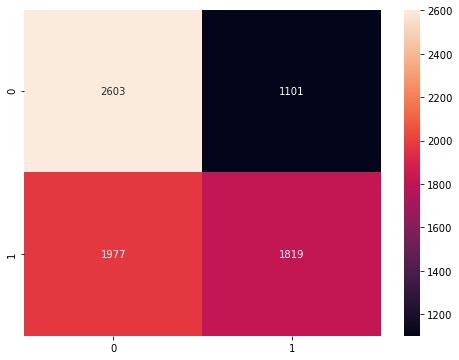

In [186]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

# Ensemble Learning models

## Random Forest Classifier

In [187]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
rfc_a=accuracy_score(prediction,y_test)
print(rfc_a)

RandomForestClassifier()

0.6448


Confusion matrix:

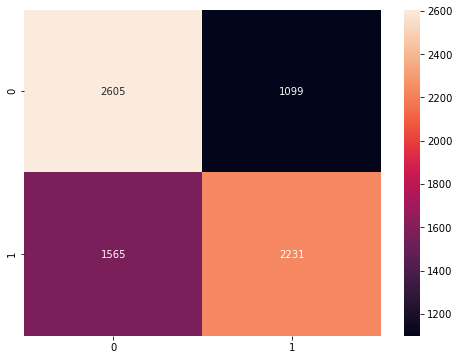

In [188]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## AdaBoost Classifier

In [189]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train,y_train)
prediction = ada.predict(x_test)
ada_a = accuracy_score(y_test, prediction)
print(ada_a)

AdaBoostClassifier(n_estimators=100, random_state=0)

0.5953333333333334


Confusion matrix:

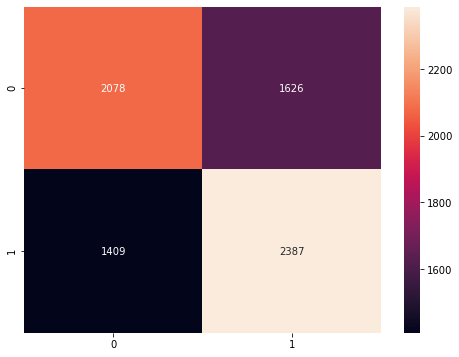

In [190]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## XGB Classifier

In [191]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
prediction = xgb.predict(x_test)
xgb_a = accuracy_score(y_test, prediction)
print(xgb_a)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.6548


Confusion matrix:

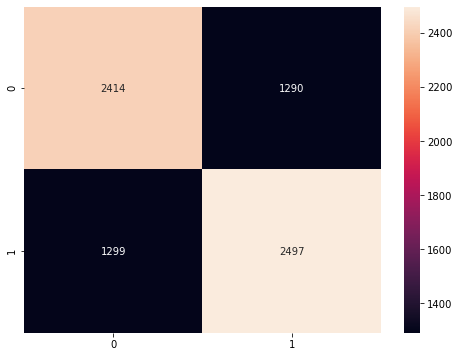

In [192]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## GradientBoostingClassifier

In [193]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train,y_train)
prediction = gbc.predict(x_test)
gbc_a = accuracy_score(y_test, prediction)
print(gbc_a)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

0.5964


Confusion matrix:

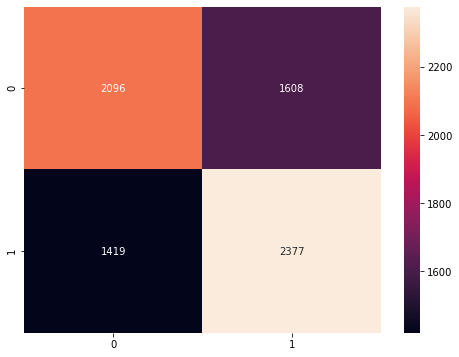

In [194]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Voting Classifier

In [195]:
r1 = logreg
r2 = dtree
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
r6 = RandomForestClassifier(n_estimators=10, random_state=42)
r7 = make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

In [196]:
vr = VotingClassifier([('lr', logreg), ('dt', dtree),('knn', knn), ('rfc',RForest)])
vr.fit(x_train,y_train)
prediction = vr.predict(x_test)
vr_a = accuracy_score(y_test, prediction)
print(vr_a)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=150)),
                             ('dt', DecisionTreeClassifier(max_depth=2)),
                             ('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('rfc', RandomForestClassifier())])

0.6176


Confusion matrix:

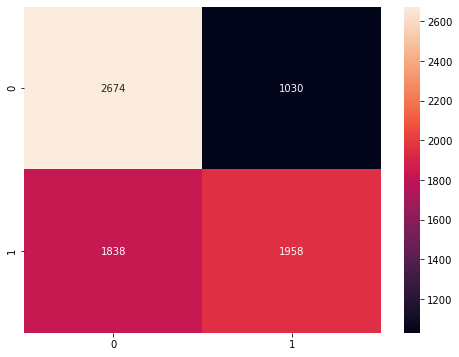

In [197]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

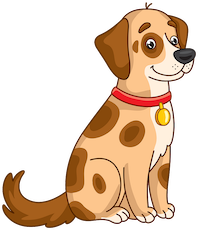

In summary:

## Model Accuracy Results Comparison

In [198]:
data = [[rfc_a*100, dtc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] ]
models=['Random Forest','Decision Tree', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

,Random Forest,Decision Tree,Pipeline,Logistic Regression,KNN,AdaBoost,XGB,Gradient Boosting,Voting
Accuracy Score (%),64.48,55.626667,65.88,54.826667,58.96,59.533333,65.48,59.64,61.76


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy Results Comparison')

Text(0.5, 0, 'Classifier')

Text(0, 0.5, 'Accuracy Score (%)')

<Figure size 432x288 with 0 Axes>

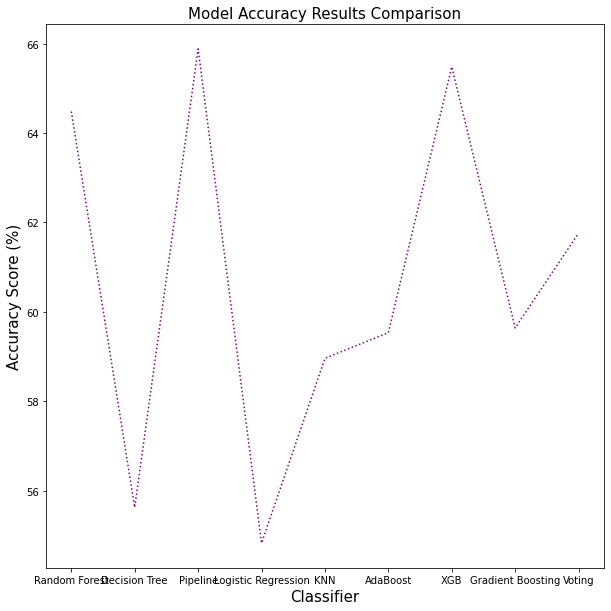

<Figure size 432x288 with 0 Axes>

In [217]:
models=['Random Forest','Decision Tree', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
data = [rfc_a*100, dtc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] 
plt.figure(figsize=(10,10))
plt.plot (models, data, linestyle=':',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 15)
plt.xlabel("Classifier", fontsize=15)
plt.ylabel("Accuracy Score (%)", fontsize = 15)
plt.figure(facecolor='w', edgecolor='k')
plt.show()

### The best result we've achieved was 65.88% accuracy, using the Pipeline model

The end